# 01 — Linear Algebra & Matrix Calculus
*A practical guide to vectors, matrices, and gradients — with NumPy and visual intuition.*

**What you'll learn**
- Core vector and matrix operations: dot products, norms, transformations, and rank.
- Linear systems and least-squares regression with geometric interpretation.
- Eigenvalues/eigenvectors and SVD for structure and dimensionality reduction.
- Matrix calculus: gradients, Jacobians, and backpropagation verification via finite differences.
- Reinforcement Learning connections — policy gradients, least-squares critics, and stability.

> **How to use this notebook:** Read the theory cells first to grasp the math intuitively,
then execute the code cells to explore visual and numerical examples.


## Setup

We use only standard scientific Python.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

def show_vec(v, title=None):
    plt.figure(figsize=(6,3))
    plt.stem(np.arange(len(v)), v, basefmt=" ", markerfmt="o", linefmt="-")
    if title: plt.title(title)
    plt.xlabel("index"); plt.ylabel("value")
    plt.tight_layout(); plt.show()

def plot_lines(X, Y, title=None, xlabel="x", ylabel="y", legend=None):
    plt.figure(figsize=(6,3.5))
    for x, y in zip(X, Y):
        plt.plot(x, y)
    if legend: plt.legend(legend)
    if title: plt.title(title)
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.tight_layout(); plt.show()

## 1. Vectors, Inner Products, and Norms

A **vector** $x \in \mathbb{R}^n$ is an ordered list of real numbers that can represent quantities such as position, velocity, weights, or features. Geometrically, vectors describe **points or directions** in space, and algebraically, they are the foundation of all linear operations.

The **inner product** (also called the dot product) measures similarity between two vectors:

$$
\langle x, y \rangle = x^\top y = \sum_{i=1}^n x_i y_i.
$$

It encodes both *magnitude* and *alignment*:  
- if $x$ and $y$ point in the same direction, the inner product is large and positive;  
- if they are orthogonal, it is zero.

From this, we derive the **norms**, which measure the "size" or "length" of a vector:

$$
\|x\|_2 = \sqrt{x^\top x}, \quad
\|x\|_1 = \sum_i |x_i|, \quad
\|x\|_\infty = \max_i |x_i|.
$$

Each norm defines a different notion of distance:
- $\|x\|_2$: Euclidean (straight-line) distance.  
- $\|x\|_1$: Manhattan distance (sum of absolute changes).  
- $\|x\|_\infty$: Maximum absolute component.


### RL Connection

In **reinforcement learning (RL)**, norms appear throughout:
- During **policy or value function optimization**, gradient magnitudes (measured via norms) determine the **step size** and **update stability**.
- **Regularization** (e.g., L2 weight decay) penalizes large parameter norms to prevent overfitting.
- In **trust region methods** (like TRPO/PPO), constraints such as $\| \theta_{new} - \theta_{old} \|_2 \leq \delta$ explicitly limit how far the new policy can move from the old one in parameter space.


Inner product (⟨x, y⟩): -0.4680
L2 norm ‖x‖₂: 2.0608
L1 norm ‖x‖₁: 5.2706
L∞ norm ‖x‖∞: 1.3032


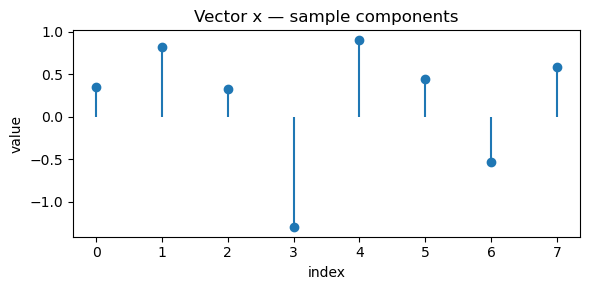

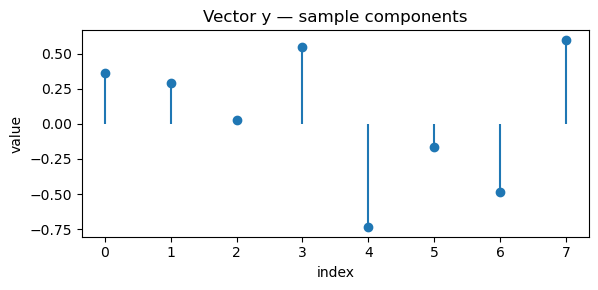

Cosine similarity between x and y: -0.1753


In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=8)
y = rng.normal(size=8)

# Inner product and norms
inner_product = np.dot(x, y)
l2_norm = np.linalg.norm(x, 2)
l1_norm = np.linalg.norm(x, 1)
linf_norm = np.linalg.norm(x, np.inf)

print(f"Inner product (⟨x, y⟩): {inner_product:.4f}")
print(f"L2 norm ‖x‖₂: {l2_norm:.4f}")
print(f"L1 norm ‖x‖₁: {l1_norm:.4f}")
print(f"L∞ norm ‖x‖∞: {linf_norm:.4f}")

# Visualization
show_vec(x, "Vector x — sample components")
show_vec(y, "Vector y — sample components")

# Angle between x and y (cosine similarity)
cosine_sim = inner_product / (np.linalg.norm(x) * np.linalg.norm(y))
print(f"Cosine similarity between x and y: {cosine_sim:.4f}")

## 2. Matrices as Linear Maps

A **matrix** $ A \in \mathbb{R}^{m \times n} $ defines a **linear transformation** — a function that maps vectors in one space to another while preserving linearity:

$$
A : \mathbb{R}^n \to \mathbb{R}^m, \quad x \mapsto Ax.
$$

This means scaling or adding vectors before or after applying $A$ gives the same result:
$$
A(\alpha x + \beta y) = \alpha Ax + \beta Ay.
$$


### Key Operations

- **Matrix–vector multiplication:** $ y = Ax $  
  → transforms input $x$ into another vector $y$.
- **Matrix–matrix multiplication:** $ C = AB $  
  → composition of two linear maps (apply $B$, then $A$).
- **Transpose:** $ A^\top $  
  → flips rows and columns, useful for projecting vectors or computing gradients.
- **Rank:** number of linearly independent rows/columns, determines how much information the transformation preserves.
- **Identity & Inverse:** $ A I = I A = A $, and $A^{-1}$ (if it exists) “undoes” the transformation.


### Geometric View

A matrix can **rotate**, **scale**, **shear**, or **project** vectors.  
For example, multiplying by a 2×2 rotation matrix changes direction but not magnitude.

$$
R(\theta) =
\begin{bmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
$$


### RL Connection

Linear algebra underpins nearly all computations in RL:

| RL Concept | Linear Algebra Formulation |
|-------------|-----------------------------|
| **Linear value approximation** | $ \hat{v}_\theta(s) = \phi(s)^\top \theta $ |
| **Batch policy/value updates** | Matrix–vector ops aggregate transitions and gradients |
| **Least-squares Temporal Difference (LSTD)** | Solves $ A\theta = b $ for optimal weights |
| **Neural network layers** | Each layer is a linear map followed by a nonlinearity $ y = W x + b $ |
| **Covariance estimation / exploration** | Uses $A^\top A$ and matrix inverses in adaptive exploration (e.g., LQR, SAC) |

Matrices act as the **computational backbone** of RL algorithms — transforming features, combining parameters, and driving every update rule.

In [3]:
rng = np.random.default_rng(3)

A = rng.normal(size=(3, 4))   # map: R^4 -> R^3
x = rng.normal(size=4)
y = A @ x

print(f"A shape: {A.shape} | x shape: {x.shape} | y shape: {y.shape}")
print("y = A x ->", np.round(y, 4))

# Rank
rank = np.linalg.matrix_rank(A)
print("rank(A):", rank)

# Use eigvals of A A^T (3x3) to match the 3 singular values
AAt = A @ A.T
evals_AAt = np.linalg.eigvalsh(AAt)        # real, ascending (len=3)
s = np.linalg.svd(A, compute_uv=False)     # len=3
print("eig(A A^T) =", np.round(evals_AAt, 6))
print("singular values(A) =", np.round(s, 6))

# Relationship: eig(A A^T) == σ^2 (same length)
diff = np.max(np.abs(np.sort(s**2) - evals_AAt))
print("max|σ^2 - eig(A A^T)| =", float(diff))

# Pseudoinverse round-trip (since A is not square)
A_pinv = np.linalg.pinv(A)
x_rec  = A_pinv @ y
y_rec  = A @ x_rec
print("‖x_rec - x‖2 =", float(np.linalg.norm(x_rec - x)))
print("‖A x_rec - y‖2 =", float(np.linalg.norm(y_rec - y)))

A shape: (3, 4) | x shape: (4,) | y shape: (3,)
y = A x -> [ 0.9139  2.4934 -2.077 ]
rank(A): 3
eig(A A^T) = [ 1.117227  4.873585 21.55489 ]
singular values(A) = [4.642724 2.20762  1.056989]
max|σ^2 - eig(A A^T)| = 1.0658141036401503e-14
‖x_rec - x‖2 = 0.3632019293509406
‖A x_rec - y‖2 = 9.930136612989092e-16


## 3. Linear Systems & Least Squares

A **linear system** seeks a vector $x$ such that $Ax = b$. If $A \in \mathbb{R}^{m \times n}$ is **square and full rank**, we can solve exactly:
$$
x = A^{-1}b.
$$
But when $A$ is **tall** or **rank-deficient**, an exact solution may not exist. In that case, we seek the **least squares** solution:
$$
x^\star = \arg\min_x \|Ax - b\|_2^2,
$$
which leads to the **normal equations**:
$$
A^\top A x^\star = A^\top b.
$$
If $A^\top A$ is invertible,
$$
x^\star = (A^\top A)^{-1} A^\top b.
$$


### Why It Matters

- Least squares finds the **best approximation** when equations are overdetermined (more equations than unknowns).
- Geometrically, it **projects** $b$ onto the column space of $A$.
- NumPy’s `np.linalg.lstsq` efficiently handles this via the **pseudoinverse**, avoiding instability from explicit inversion.


### RL Connection

Least-squares ideas appear in many RL algorithms:

| RL Method | Role of Least Squares |
|------------|-----------------------|
| **LSTD (Least-Squares Temporal Difference)** | Solves $ A \theta = b $ where $ A = \Phi^\top (\Phi - \gamma P \Phi) $ to estimate value function weights. |
| **LSPI (Least-Squares Policy Iteration)** | Alternates between policy evaluation and improvement using least-squares regression. |
| **Linear regression in reward models** | Fits reward functions or Q-values linearly from sampled data. |
| **Fitting critic networks (DDPG, TD3)** | Often minimizes mean squared Bellman error (a least-squares objective). |

Thus, least squares provides a **foundation for stable and efficient RL value estimation** and function approximation.

True  w: [ 2.  -1.   0.5]
LS    w: [ 1.968201 -1.002569  0.498897]
Pinv  w: [ 1.968201 -1.002569  0.498897]
‖w_ls - w_true‖₂ = 0.031921770267466947
‖w_ls - w_pinv‖₂ = 8.617648093045562e-16
rank(A) = 3 | singular values = [8.131331 7.517761 5.316543]
RSS = 0.4387395811001026 | R² = 0.9985768440268379


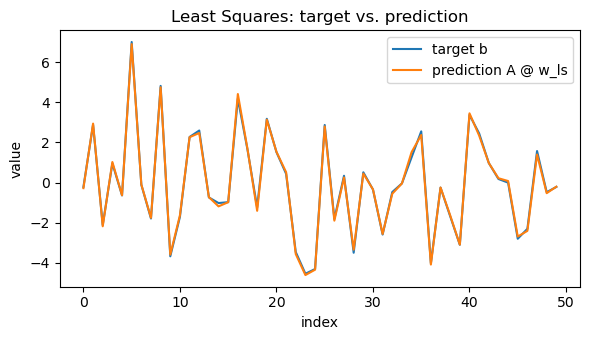

In [4]:
rng = np.random.default_rng(4)

m, n = 50, 3
A = rng.normal(size=(m, n))
w_true = np.array([2.0, -1.0, 0.5])
noise = 0.1 * rng.normal(size=m)
b = A @ w_true + noise

# Solve with stable least squares (SVD-based)
w_ls, residuals, rank, svals = np.linalg.lstsq(A, b, rcond=None)

# Also compute the closed-form (pseudo-inverse) solution for reference
w_pinv = np.linalg.pinv(A) @ b

# Diagnostics
residual_vec = b - A @ w_ls
rss = float(residual_vec @ residual_vec) # residual sum of squares
tss = float(((b - b.mean()) ** 2).sum()) # total sum of squares
r2 = 1.0 - rss / tss if tss > 0 else np.nan

print("True  w:", np.round(w_true, 6))
print("LS    w:", np.round(w_ls,   6))
print("Pinv  w:", np.round(w_pinv, 6))
print("‖w_ls - w_true‖₂ =", float(np.linalg.norm(w_ls - w_true)))
print("‖w_ls - w_pinv‖₂ =", float(np.linalg.norm(w_ls - w_pinv)))
print("rank(A) =", rank, "| singular values =", np.round(svals, 6))
print("RSS =", rss, "| R² =", r2)

# Visual: prediction vs. target (single figure)
y_pred = A @ w_ls
x_axis = np.arange(m)
plt.figure(figsize=(6, 3.5))
plt.plot(x_axis, b, label="target b")
plt.plot(x_axis, y_pred, label="prediction A @ w_ls")
plt.title("Least Squares: target vs. prediction")
plt.xlabel("index")
plt.ylabel("value")
plt.legend()
plt.tight_layout()
plt.show()

## 4. Eigenvalues & Eigenvectors

For a square matrix $ M \in \mathbb{R}^{n \times n} $, an **eigenpair** $(\lambda, v)$ satisfies the fundamental relation:

$$
M v = \lambda v
$$

Here:
- $v$ is a **nonzero eigenvector**, and  
- $\lambda$ is its corresponding **eigenvalue**, indicating how $M$ scales $v$.


### Key Properties

- For a **symmetric** matrix $M = M^\top$, eigenvalues are **real**, and eigenvectors can be chosen **orthogonal**.  
  Its **eigendecomposition** is:
$$
  M = Q \Lambda Q^\top
  $$
  where $Q$ is an orthogonal matrix (columns are eigenvectors) and $\Lambda$ is diagonal (eigenvalues).

- The **spectral radius**:
$$
  \rho(M) = \max_i |\lambda_i|
  $$
  quantifies how repeated applications of $M$ amplify vectors — important for assessing **stability** in iterative methods.

- A matrix is **diagonalizable** if it can be expressed as $M = P \Lambda P^{-1}$, which simplifies powers and exponentials:
$$
  M^k = P \Lambda^k P^{-1}
  $$


### RL Connection

Eigenvalues and eigenvectors play a deep role in the theoretical and practical analysis of RL:

| Concept | Role of Eigenvalues |
|----------|--------------------|
| **Bellman Operator Stability** | The spectral radius of the transition kernel or Bellman operator determines contraction properties — ensuring convergence of value iteration. |
| **Successor Features / Eigenoptions** | Eigenvectors of the state-transition matrix (graph Laplacian) reveal temporally extended behaviors (options) that help exploration. |
| **Linear Value Function Approximation** | The conditioning of $A^\top A$ (related to its eigenvalues) affects stability and learning rate choice in least-squares TD methods. |
| **Policy Evaluation** | Spectral analysis explains the convergence speed and variance in iterative solvers for $V = T_\pi V$. |

In essence, **spectral analysis gives insight into how information propagates, contracts, or diverges** within an RL agent’s learning dynamics.

Eigenvalues (desc): [ 0.761799  0.011447 -0.910926 -2.013912]
True dominant eigenvalue λ_max: 0.761799
Estimated λ_max (Rayleigh): -2.013912
|cos(angle(v_est, v_true))|: 0.000000


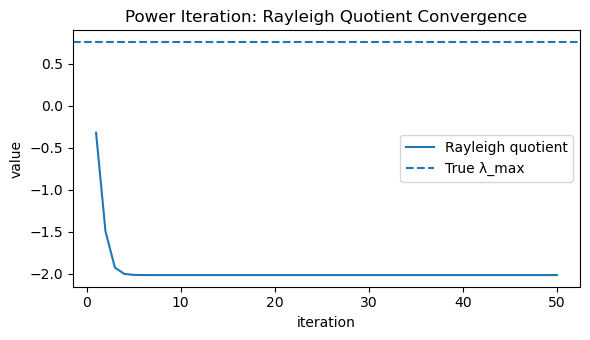

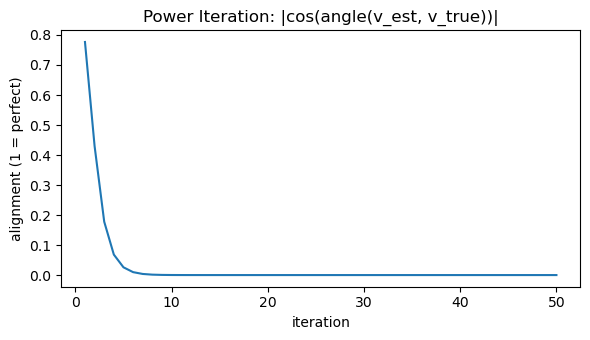

In [5]:
rng = np.random.default_rng(5)

# Symmetric matrix (real eigensystem)
M = rng.normal(size=(4, 4))
M = 0.5 * (M + M.T)

# Ground truth eigensystem (sorted descending for convenience)
eigvals, eigvecs = np.linalg.eigh(M) # ascending
idx_desc = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx_desc]
eigvecs = eigvecs[:, idx_desc]
lam_max_true = float(eigvals[0])
v_max_true = eigvecs[:, 0]

print("Eigenvalues (desc):", np.round(eigvals, 6))
print("True dominant eigenvalue λ_max:", round(lam_max_true, 6))

# Power iteration to estimate dominant eigenpair
def safe_norm(x, eps=1e-12):
    n = np.linalg.norm(x)
    return x / (n + eps)

v = rng.normal(size=M.shape[0])
v = safe_norm(v)

rayleigh_hist = []
cos_sim_hist = []

max_iters = 50
for _ in range(max_iters):
    v = safe_norm(M @ v) # normalize each step
    rq = float(v.T @ M @ v) # Rayleigh quotient
    rayleigh_hist.append(rq)
    # alignment to true eigenvector (sign-invariant)
    cos_sim = abs(float(np.dot(v, v_max_true)))
    cos_sim_hist.append(cos_sim)

lam_est = rayleigh_hist[-1]
cos_est = cos_sim_hist[-1]
print(f"Estimated λ_max (Rayleigh): {lam_est:.6f}")
print(f"|cos(angle(v_est, v_true))|: {cos_est:.6f}")

# Figure 1: Rayleigh quotient convergence to λ_max
plt.figure(figsize=(6, 3.5))
plt.plot(np.arange(1, max_iters + 1), rayleigh_hist, label="Rayleigh quotient")
plt.axhline(lam_max_true, linestyle="--", label="True λ_max")
plt.title("Power Iteration: Rayleigh Quotient Convergence")
plt.xlabel("iteration")
plt.ylabel("value")
plt.legend()
plt.tight_layout()
plt.show()

# Figure 2: Alignment of eigenvector estimate with true dominant eigenvector
plt.figure(figsize=(6, 3.5))
plt.plot(np.arange(1, max_iters + 1), cos_sim_hist)
plt.title("Power Iteration: |cos(angle(v_est, v_true))|")
plt.xlabel("iteration")
plt.ylabel("alignment (1 = perfect)")
plt.tight_layout()
plt.show()

## 5. Singular Value Decomposition (SVD)

The **Singular Value Decomposition (SVD)** is a powerful matrix factorization that expresses any rectangular matrix $A \in \mathbb{R}^{m \times n}$ as:

$$
A = U \Sigma V^\top
$$

where:

- $U \in \mathbb{R}^{m \times m}$ — orthogonal matrix (left singular vectors)  
- $V \in \mathbb{R}^{n \times n}$ — orthogonal matrix (right singular vectors)  
- $\Sigma \in \mathbb{R}^{m \times n}$ — diagonal matrix of **singular values** $\sigma_1 \ge \sigma_2 \ge \cdots \ge 0$

Each $\sigma_i$ captures the *amount of variance or energy* along the corresponding singular direction.  
This means that SVD identifies the **most important directions** in which $A$ acts on data.


### Key Insights

- **Rank and energy:**
  The number of non-zero singular values equals the rank of $A$.  
  The Frobenius norm satisfies:
  $$
  \|A\|_F^2 = \sum_i \sigma_i^2
  $$
  meaning that singular values measure how much “information” or “energy” each dimension contributes.

- **Best low-rank approximation:**
  The **Eckart–Young theorem** states:
  $$
  A_k = U_k \Sigma_k V_k^\top
  $$
  is the best rank-$k$ approximation of $A$ (minimizing $\|A - A_k\|_F$).

- **Geometric intuition:**
  $V$ rotates the input space, $\Sigma$ scales by singular values, and $U$ rotates the output space.


### RL Connection

| RL Concept | How SVD Helps |
|-------------|----------------|
| **Feature Compression / Representation Learning** | SVD identifies low-dimensional structure in state or feature matrices, enabling compact embeddings with minimal information loss. |
| **Low-Rank Value Function Approximation** | In large state spaces, value functions can be approximated using truncated SVD for faster computation and generalization. |
| **Transition Model Factorization** | Decomposing $P(s'|s,a)$ matrices via SVD reveals latent dynamics or reduces noise. |
| **Policy Evaluation Stability** | Small singular values in feature matrices indicate ill-conditioning — guiding regularization or preconditioning strategies. |

A shape: (40, 20)
Top-10 singular values: [10.2052  9.0294  8.2849  8.1918  7.9007  7.3019  7.1258  6.53    6.4572
  5.9514]
Frobenius ‖A‖_F = 27.9546
Rank-5 error ‖A - A_k‖_F = 19.9403  (relative 71.33%)
Energy retained by top 5: 49.12%
Rank-6 error ‖A - A_k+1‖_F = 18.5552  (should be ≤ rank-5 error)


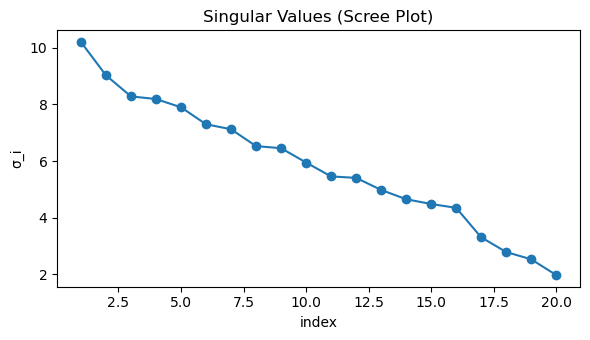

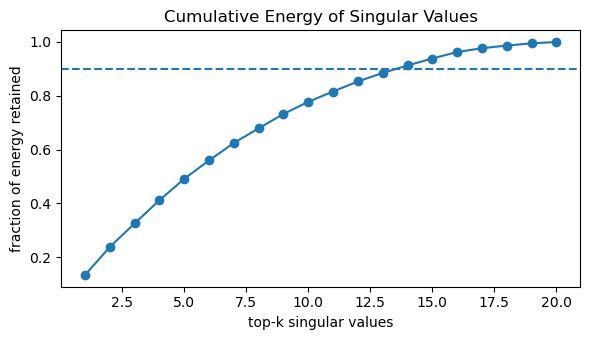

In [6]:
rng = np.random.default_rng(6)
A = rng.normal(size=(40, 20))

# Economy SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)  # U: (40,r), S: (r,), Vt: (r,20), r=min(40,20)=20

# Rank-k approximation via Eckart–Young
k = 5
A_k = (U[:, :k] * S[:k]) @ Vt[:k, :] # equivalent to U_k @ diag(S_k) @ V_k^T

# Frobenius norms and relative error
fro_full = np.linalg.norm(A, "fro")
fro_err  = np.linalg.norm(A - A_k, "fro")
rel_err  = fro_err / fro_full

# Energy retained by top-k singular values
energy_total = np.sum(S**2)
energy_k     = np.sum(S[:k]**2)
energy_ratio = energy_k / energy_total

print("A shape:", A.shape)
print("Top-10 singular values:", np.round(S[:10], 4))
print(f"Frobenius ‖A‖_F = {fro_full:.4f}")
print(f"Rank-{k} error ‖A - A_k‖_F = {fro_err:.4f}  (relative {100*rel_err:.2f}%)")
print(f"Energy retained by top {k}: {100*energy_ratio:.2f}%")

# Compare with k+1 to show monotone improvement
k2 = k + 1
A_k2 = (U[:, :k2] * S[:k2]) @ Vt[:k2, :]
err_k2 = np.linalg.norm(A - A_k2, "fro")
print(f"Rank-{k2} error ‖A - A_k+1‖_F = {err_k2:.4f}  (should be ≤ rank-{k} error)")

# Scree plot of singular values
plt.figure(figsize=(6, 3.5))
plt.plot(np.arange(1, len(S) + 1), S, marker="o")
plt.title("Singular Values (Scree Plot)")
plt.xlabel("index")
plt.ylabel("σ_i")
plt.tight_layout()
plt.show()

# Cumulative energy plot (how many σ_i capture most variance)
cum_energy = np.cumsum(S**2) / energy_total
plt.figure(figsize=(6, 3.5))
plt.plot(np.arange(1, len(S) + 1), cum_energy, marker="o")
plt.axhline(0.9, linestyle="--") # 90% energy reference
plt.title("Cumulative Energy of Singular Values")
plt.xlabel("top-k singular values")
plt.ylabel("fraction of energy retained")
plt.tight_layout()
plt.show()

## 6. Matrix Calculus — Gradients & Jacobians

Matrix calculus generalizes differentiation to **vector** and **matrix-valued functions**. It forms the mathematical backbone of optimization in machine learning and reinforcement learning (RL).


### Gradients with Respect to Vectors

For a scalar function $ f(x) = \tfrac{1}{2}\|A x - b\|_2^2 $, where $A \in \mathbb{R}^{m \times n}$, $x \in \mathbb{R}^n$, and $b \in \mathbb{R}^m$, the **gradient** is:

$$
\nabla_x f = A^\top (A x - b)
$$

This comes from expanding $f(x) = \tfrac{1}{2}(A x - b)^\top (A x - b)$ and applying the chain rule.

The gradient points in the direction of steepest ascent of $f$, and $-\nabla_x f$ is used for gradient descent.


### Gradients with Respect to Matrices

For $ f(W) = \tfrac{1}{2}\|W x - y\|_2^2 $, with $W \in \mathbb{R}^{m \times n}$, $x \in \mathbb{R}^n$, and $y \in \mathbb{R}^m$:

$$
\nabla_W f = (W x - y) x^\top
$$

This result follows directly from the vector case and the chain rule. Each element of $\nabla_W f$ represents the partial derivative of $f$ with respect to $W_{ij}$.


### Jacobian Matrix

For a vector-valued function $ g(x): \mathbb{R}^n \to \mathbb{R}^m $, the **Jacobian** $ J_g(x) \in \mathbb{R}^{m \times n} $ is defined as:

$$
[J_g(x)]_{ij} = \frac{\partial g_i(x)}{\partial x_j}
$$

It generalizes the derivative to multivariate mappings, encoding how each component of $g$ changes with each component of $x$.


### RL Connection

Matrix calculus underpins nearly every gradient-based RL algorithm:

| RL Concept | Mathematical Role |
|-------------|-------------------|
| **Policy Gradient** | Derives updates like $ \nabla_\theta J(\pi_\theta) = \mathbb{E}_\pi[\nabla_\theta \log \pi_\theta(a\|s) G_t] $ |
| **Backpropagation in Value Networks** | Uses Jacobians to propagate derivatives through multiple layers of parameters $W_i$ |
| **Actor–Critic Methods** | Require computing gradients of expected returns through both policy and value functions |
| **Natural Gradients** | Use curvature information (Fisher matrix) — an extension of Jacobian-based second-order methods |

In short, **matrix calculus is the language of optimization** — translating loss functions into actionable gradient updates in reinforcement learning.

In [7]:
# Gradient wrt vector x
def f_x(x, A, b):
    """Scalar function f(x) = 1/2 * ||A x - b||^2"""
    r = A @ x - b
    return 0.5 * float(r.T @ r)

def grad_x(x, A, b):
    """Analytical gradient ∇x f = Aᵀ(Ax - b)"""
    return A.T @ (A @ x - b)

def numgrad_x(x, A, b, eps=1e-5):
    """Finite-difference approximation of gradient wrt x"""
    g = np.zeros_like(x)
    for i in range(len(x)):
        x1 = x.copy(); x1[i] += eps
        x2 = x.copy(); x2[i] -= eps
        g[i] = (f_x(x1, A, b) - f_x(x2, A, b)) / (2 * eps)
    return g

# Test gradient wrt x
rng = np.random.default_rng(7)
m, n = 30, 4
A = rng.normal(size=(m, n))
x = rng.normal(size=n)
b = rng.normal(size=m)

g_theory = grad_x(x, A, b)
g_num = numgrad_x(x, A, b)

print("∇x_theory =", np.round(g_theory, 6))
print("∇x_num    =", np.round(g_num, 6))
print("‖∇x_theory - ∇x_num‖₂ =", np.linalg.norm(g_theory - g_num))

# Gradient wrt matrix W
def f_W(W, x, y):
    """Scalar function f(W) = 1/2 * ||W x - y||^2"""
    r = W @ x - y
    return 0.5 * float(r.T @ r)

def grad_W(W, x, y):
    """Analytical gradient ∇W f = (W x - y) xᵀ"""
    r = W @ x - y
    return np.outer(r, x)

def numgrad_W(W, x, y, eps=1e-5):
    """Finite-difference approximation of gradient wrt each element W[i,j]"""
    G = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W1 = W.copy(); W1[i, j] += eps
            W2 = W.copy(); W2[i, j] -= eps
            G[i, j] = (f_W(W1, x, y) - f_W(W2, x, y)) / (2 * eps)
    return G

# Test gradient wrt W
rng = np.random.default_rng(8)
m, n = 5, 3
W = rng.normal(size=(m, n))
x = rng.normal(size=n)
y = rng.normal(size=m)

G_theory = grad_W(W, x, y)
G_num = numgrad_W(W, x, y)

print("\n∇W_theory =\n", np.round(G_theory, 6))
print("∇W_num    =\n", np.round(G_num, 6))
print("‖∇W_theory - ∇W_num‖_F =", np.linalg.norm(G_theory - G_num))

∇x_theory = [-18.687021  -1.964063 -15.837229 -63.186924]
∇x_num    = [-18.687021  -1.964063 -15.837229 -63.186924]
‖∇x_theory - ∇x_num‖₂ = 2.7846929469737626e-09

∇W_theory =
 [[-1.298238  0.090769 -3.062965]
 [-0.052729  0.003687 -0.124406]
 [ 0.239965 -0.016778  0.566154]
 [ 0.29452  -0.020592  0.694868]
 [ 0.70727  -0.04945   1.668681]]
∇W_num    =
 [[-1.298238  0.090769 -3.062965]
 [-0.052729  0.003687 -0.124406]
 [ 0.239965 -0.016778  0.566154]
 [ 0.29452  -0.020592  0.694868]
 [ 0.70727  -0.04945   1.668681]]
‖∇W_theory - ∇W_num‖_F = 3.381426609910155e-11


## 7. Chain Rule & Backpropagation

The **chain rule** is the backbone of backpropagation — the mechanism that allows deep neural networks to learn. It lets us compute gradients of *composite functions* efficiently by applying local derivatives layer by layer.


### Theoretical Setup

Consider a two-layer (nonlinear) mapping:

$$
f(x) = W_2 \, \sigma(W_1 x),
$$

where:
- $x \in \mathbb{R}^{n}$ is the input,  
- $W_1 \in \mathbb{R}^{h \times n}$ and $W_2 \in \mathbb{R}^{m \times h}$ are weight matrices,  
- $\sigma(\cdot)$ is an elementwise nonlinearity (e.g., $\tanh$).  

We define a simple **loss function**:
$$
L = \tfrac{1}{2} \| f(x) - y \|^2,
$$
where $y \in \mathbb{R}^m$ is the target output.


### Analytical Gradients

Let:
$$
h = \tanh(W_1 x), \quad f(x) = W_2 h.
$$

Then, the gradients follow from the **chain rule**:

$$
\nabla_{W_2} L = (f(x) - y) \, h^\top,
$$
$$
\nabla_{W_1} L = \Big( W_2^\top (f(x) - y) \odot (1 - h^2) \Big) x^\top.
$$

Here:
- $ \odot $ denotes elementwise multiplication,
- $ (1 - h^2) $ is the derivative of $\tanh(z)$,
- The first term backpropagates the **error** through the linear and nonlinear layers.

These equations are exactly what automatic differentiation computes under the hood in frameworks like PyTorch or TensorFlow.


### RL Connection

Backpropagation is central to modern RL — particularly **policy-gradient** and **actor–critic** methods — because it allows agents to learn from differentiable signals.

| RL Concept | Backpropagation Role |
|-------------|----------------------|
| **Policy Networks** | Gradients of $ \log \pi_\theta(a\|s) $ are computed via backprop. |
| **Value Function Approximation** | Gradients of mean-squared error loss $ (V_\theta(s) - G_t)^2 $ use the same chain rule. |
| **Actor–Critic Updates** | The critic’s backpropagated signal informs the actor’s gradient direction. |
| **End-to-End Differentiable Agents** | From state embeddings to reward models — all components train using backpropagation. |

In [8]:
# Forward / Loss / Analytic Gradients
def forward(W1, W2, x):
    h = np.tanh(W1 @ x) # hidden
    yhat = W2 @ h # output (linear)
    return yhat, h

def loss(W1, W2, x, y):
    yhat, _ = forward(W1, W2, x)
    r = yhat - y
    return 0.5 * float(r @ r) # 1/2 ||yhat - y||^2

def grad_Ws(W1, W2, x, y):
    yhat, h = forward(W1, W2, x)
    r  = yhat - y # (m,)
    dW2 = np.outer(r, h) # (m,h)
    dh  = W2.T @ r # (h,)
    dW1 = np.outer(dh * (1.0 - h**2), x) # (h,n)  since d/dz tanh(z)=1-tanh^2(z)
    return dW1, dW2

# Numerical Gradient (central difference)
def numgrad_mat(fun, W, eps=1e-5):
    G = np.zeros_like(W)
    for idx in np.ndindex(*W.shape):
        W1 = W.copy(); W1[idx] += eps
        W2 = W.copy(); W2[idx] -= eps
        G[idx] = (fun(W1) - fun(W2)) / (2.0 * eps)
    return G

# Helper: report absolute and relative errors
def grad_report(name, G_th, G_num, atol=1e-6, rtol=1e-6):
    diff = G_th - G_num
    abs_err = np.linalg.norm(diff) # Frobenius/2-norm
    rel_den = max(1.0, np.linalg.norm(G_th), np.linalg.norm(G_num))
    rel_err = abs_err / rel_den
    max_abs = float(np.max(np.abs(diff)))
    print(f"{name}: ‖th - num‖ = {abs_err:.3e} | rel = {rel_err:.3e} | max|diff| = {max_abs:.3e}")

# Testing with a fixed seed
rng = np.random.default_rng(9)
h, n, m = 6, 4, 3 # hidden, in_dim, out_dim
W1 = 0.5 * rng.normal(size=(h, n))
W2 = 0.5 * rng.normal(size=(m, h))
x  = rng.normal(size=n)
y  = rng.normal(size=m)

# Analytic grads
dW1, dW2 = grad_Ws(W1, W2, x, y)

# Numerical grads (central differences)
fW1 = lambda W: loss(W, W2, x, y)
fW2 = lambda W: loss(W1, W, x, y)
dW1_num = numgrad_mat(fW1, W1, eps=1e-5)
dW2_num = numgrad_mat(fW2, W2, eps=1e-5)

# Reports
grad_report("∇W1", dW1, dW1_num)
grad_report("∇W2", dW2, dW2_num)

∇W1: ‖th - num‖ = 1.032e-10 | rel = 4.147e-11 | max|diff| = 3.390e-11
∇W2: ‖th - num‖ = 5.212e-11 | rel = 1.369e-11 | max|diff| = 2.585e-11


## Key Takeaways

- **Vectors, Matrices, and Norms** — build the language for representing data and transformations.  
- **Linear Systems & Least Squares** — form the basis of value-function approximation and regression.  
- **Eigenvalues & SVD** — reveal structure, stability, and low-rank approximations in RL models.  
- **Matrix Calculus & Backpropagation** — provide the mathematical backbone for gradient-based learning.  
- **Chain Rule** — powers end-to-end differentiable optimization in modern RL and deep learning.

> Linear algebra and matrix calculus are the foundation of neural function approximation, gradient-based policy updates, and value estimation in reinforcement learning.

**Next:** `02_gradient_descent_from_scratch.ipynb` → implement optimization from first principles: gradients, learning rate, convergence, and visualization of loss surfaces.